# Decision Trees

It is a *supervised learning* algorithm used both for **regression** and **classification** tasks.

It works by **recursively splitting the dataset** based on feature values to create a *tree-like structure* that models decisions.

### Key concepts

* Nodes: subsets of the dataset, where the
    * Root node contains the entire dataset before any splitting,
    * Internal nodes which contain a subset of the dataset, partially split, with *child nodes* that further divide the data, and
    * Leaf nodes which contain a subset of data points that are no longer split further due to meeting a **stopping criteria**.

* Impurity: a measure of how mixed the data in a node is. Common measures include
    * Gini Impurity: $Gini = 1 - \sum p_{i}^2$ where $p_{i}$ is the probability of class $i$
    * Entropy: $-\sum p_{i} log_{2}(p_{i}) $ 
    * Mean Squared Error, used for regression tasks

* Stopping condiction: a set of rules to decide whether the node in question is fully split or not


### How Decision Trees work?

At each node, the algorithm evaluates all possible splits based on the chosen metric. The process repeats for each child node until a stopping condition is met (e.g., maximum depth, minimum samples per node, or no significant improvement in splits).
For classification, the most common class in the leaf node is the output. For regression, the average of the target values is returned.

### Pros and Cons of Decision Trees

Decision Trees are easy to interpret and visualize, and requiere minimal data preprocessing (e.g., no need for normalization or scaling). 

They can handle both numerical and categorical data and are capable of capturing non-linear relationships.

On the downside the algorithm is prone to overfitting if the tree is too deep and is sensitive to small changes in the data (high variance). Another disadvantage is that it can be biased toward features with more levels (e.g., categorical features with many categories).

### Hyperparameters to tune

1. **Max Depth**: maximum number of levels (each level corresponds to a split) in the tree from the root node to the *deepest* leaf node. In other words, is the longest path possible from the root node to a leaf node. It limits the depth of the tree to prevent overfitting.

2. **Min Samples Split**: sets the minimum number of data points that a node must contain for the algorithm to consider splitting it into child nodes. If a node has fewer samples than this value, it will not be split further.

3. **Min Samples Leaf**: this sets the minimum number of samples required to be at a leaf node.  

4. **Max Features**: maximum number of features considered for splitting. Introduces randomness and reduces overfitting.

5. **Criterion**: Metric used to evaluate splits (e.g., Gini impurity, entropy, or MSE).

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target

In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Create and train the decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

In [13]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [15]:
# Print the values of the performance metrics
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [16]:
# Print the confusion matrix and the derived metrics
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



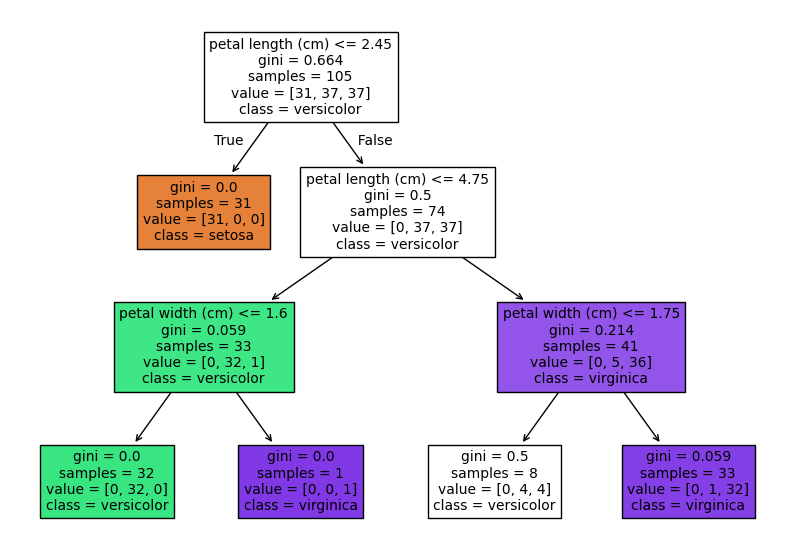

In [17]:
# Visualize the tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()